# YouTube Comment Analysis
This notebook includes:
- Sentiment classification (TF-IDF + Logistic Regression)
- Transformer-based sentiment classifier
- Topic modeling with LDA

- Sentiment analysis is used to determine the sentiment behind the textual data. In the context of youtube comments it helps to understand how viewers liked the videos or not. Based on sentiments, content creator can improve their content and focus on the topics that his/her viewers likes.
- In business it helps gain valuable customer experiences about particular item/brand. Which in turn helps in improving produt quality and customer experience.

## Importing librabries 

In [36]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# read the preprocessed dataset in csv format
df = pd.read_csv("data_with_short_comments_for_further_analysis.csv", engine='python', escapechar='\\', on_bad_lines='skip')

# Clean comments
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'[^A-Za-z\u0900-\u097F\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['comment'] = df['comment'].fillna('').apply(clean_text)
df = df.dropna(subset=['comment', 'sentiment'])

In [38]:
df.head()

,video_id,author,comment,language,short_comment,sentiment
0,EL7OF3Kqw-4,@PrakashSaput,चलचित्र बसन्तमा रहेको एउटा गीत मोटर को लिरिकल ...,Nepali,"चलचित्र बसन्तमा रहेको एउटा गीत ""मोटर"" को लिरिक...",3 stars
1,EL7OF3Kqw-4,@Pareshrai_official,Music compose मा Jhuma limbu jiu koi name raix...,Nepali,Music compose मा Jhuma limbu jiu koi name raix...,3 stars
2,EL7OF3Kqw-4,@SunilsenchuryAakarengineer-y3w,Prakash dai is My best hearing in Nepal you ar...,English,Prakash dai is My best hearing in Nepal❤❤ ❤❤❤❤...,5 stars
3,EL7OF3Kqw-4,@SushmitaKC-nz5ch,Songs are really nice heart touching plz we ne...,English,Songs are really nice heart touching plz we ne...,5 stars
4,EL7OF3Kqw-4,@Silent-Simma,Wordings are great in the song Love it,English,Wordings are great in the song. Love it🙏🏻,5 stars


## Term Frequency - inverse documentry frequency (TF-IDF)  + Logistic Regression (Baseline)

## Vectorize the text data

In [39]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = df['comment']
y = df['label']
X_vec = vectorizer.fit_transform(X)

## Model training, Evaluation and prediction

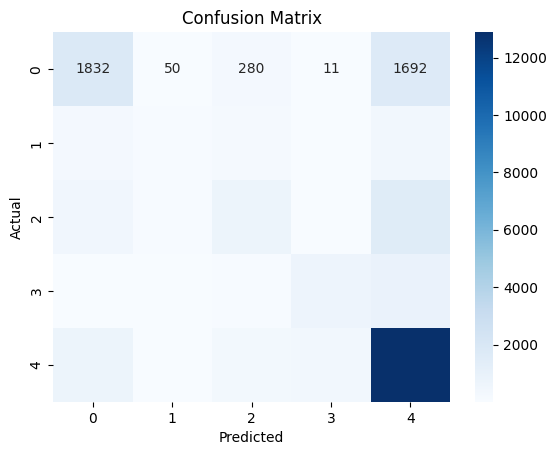

0.6771266855335442


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt = 'd', cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(accuracy)
#print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

## Lets display classification report

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

report_dict = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, output_dict=True
)

df_report = pd.DataFrame(report_dict).transpose().iloc[:-3]  # drop macro/weighted avg

# Lets add comments on it
def comment_row(row):
    f1 = row['f1-score']
    recall = row['recall']
    if f1 >= 0.7:
        return "Excellent"
    elif f1 >= 0.5:
        return "Good"
    elif recall < 0.2:
        return "Very low recall – model struggles"
    else:
        return "Needs improvement"
        
df_report['Comment'] = df_report.apply(comment_row, axis=1)
df_report = df_report.round(2)

,precision,recall,f1-score,support,Comment
1 star,0.54,0.47,0.51,3865,Good
2 stars,0.39,0.10,0.16,1104,Very low recall – model struggles
3 stars,0.43,0.26,0.32,2860,Needs improvement
4 stars,0.58,0.40,0.47,1747,Needs improvement
5 stars,0.74,0.89,0.81,14452,Excellent


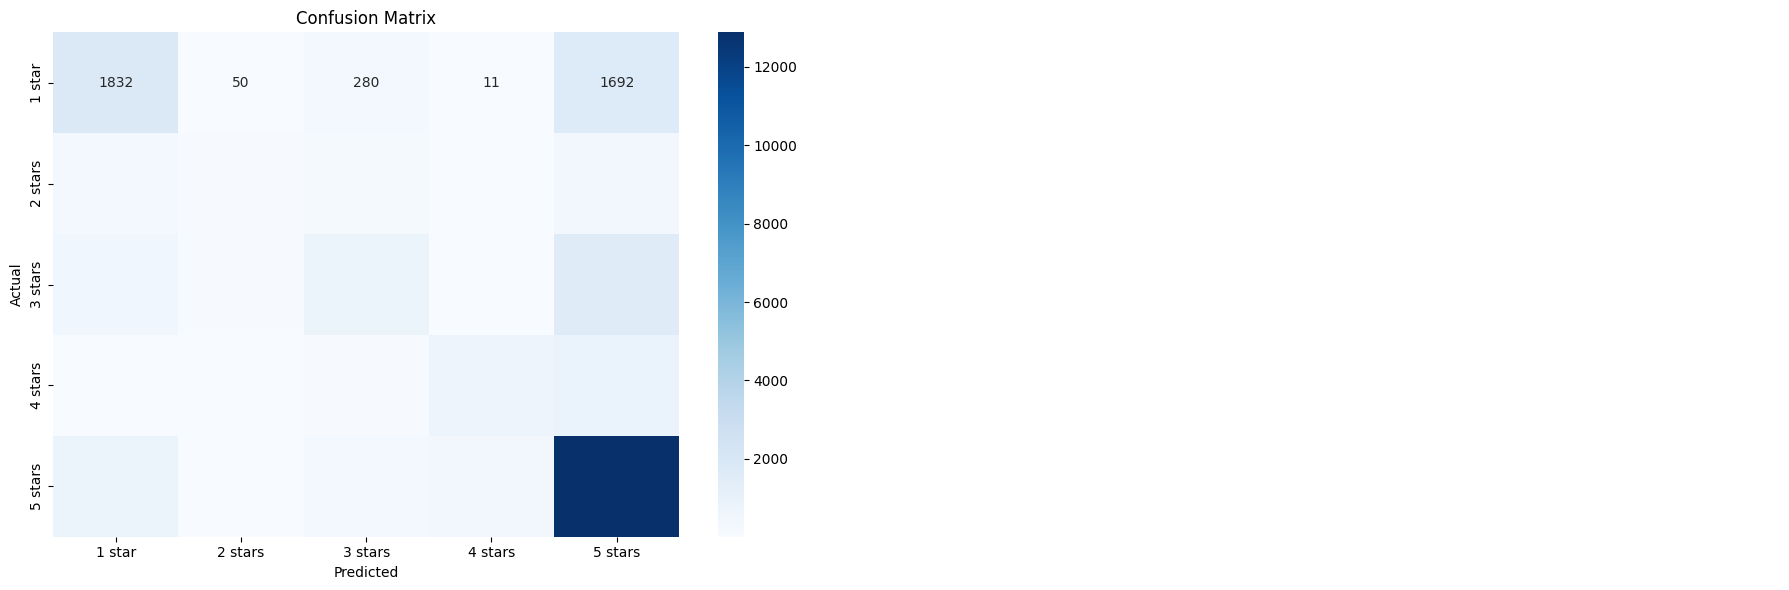

In [42]:
#Lets make a display plot, we will create two plots here

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1.2]})

# for confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

ax[1].axis('off')

#styled classification report
styled_table = df_report.style.background_gradient(
    subset=['precision', 'recall', 'f1-score'], cmap='YlGn'
).format({
    'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'
}).set_properties(subset=['Comment'], **{'font-weight': 'bold'})


# Display table using IPython
from IPython.display import display
display(styled_table)

# Show both plot
plt.tight_layout()
plt.show()

## Key Observations

- The model performs well on 5-star reviews, which represent the majority of the dataset. These reviews are predicted with high precision and recall, indicating the model has learned their vocabulary effectively.

- 1-star reviews show moderate performance. Many are correctly classified, but some are confused with 2-star or even 5-star reviews, which could stem from sarcasm or ambiguous tone in negative comments.

- 2- and 3-star reviews have poor recall, and are often misclassified as neighboring classes like 3 or 4 stars. This reflects the challenge of differentiating mid-level sentiment using TF-IDF, which doesn’t capture context.

- 4-star reviews perform better than mid-range classes but worse than 5-star reviews. Showing some overlap in vocabulary and sentiment intensity.

## Problem areas

- The model performs well on 5-star reviews, which represent the majority of the dataset. These reviews are predicted with high precision and recall, indicating the model has learned their vocabulary effectively.

- 1-star reviews show moderate performance. Many are correctly classified, but some are confused with 2-star or even 5-star reviews, which could stem from sarcasm or ambiguous tone in negative comments.

- 2- and 3-star reviews have poor recall, and are often misclassified as neighboring classes like 3 or 4 stars. This reflects the challenge of differentiating mid-level sentiment using TF-IDF, which doesn’t capture context.

- 4-star reviews perform better than mid-range classes but worse than 5-star reviews, again showing some overlap in vocabulary and sentiment intensity.

The TF-IDF + Logistic Regression model is able to classify strongly positive reviews (5 stars) effectively, but struggles with mid-range sentiment (2–3 stars), which are often confused with adjacent ratings. These challenges reflect both data imbalance and the limitations of context-free features in TF-IDF. With targeted improvements in feature extraction and training strategy, performance across all classes can be improved.

## Transformer-Based Sentiment Classifier (MiniLM + Logistic Regression)

In [43]:
df.shape

(120140, 7)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

#Load pre-trained tokenizer and model from sentence - transformers (MiniLM variant)
#This model gives 384-dimensional sentence embeddings
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

#Define a function to compute sentence embeddings from raw text
def get_embeddings(texts, tokenizer, model):
    
    #Tikenize the list of input texts into tensors / truncated to max length
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=128)

    #Turn off gradient calculations
    with torch.no_grad():
        
        #Pass inputs througb transformer model
        outputs = model(**inputs)
        
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

#Due to computational reason, I will take few thousands of data only
import time
#Start timer
start_time = time.time()
df_sampled = df.sample(n=25000, random_state=42) if len(df) > 1000 else df.copy()
X_embed = get_embeddings(df_sampled['comment'].tolist(), tokenizer, model)
y = LabelEncoder().fit_transform(df_sampled['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X_embed, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
#end timer
end_time  = time.time()
# Print total runtime in seconds
print(f"⏱️ Total execution time: {end_time - start_time:.2f} seconds")